# Data Overview

In [49]:
import pandas as pd
import numpy as np
import pandas as pd
from main import get_files, get_data, create_connection, export_data
from get_average_sentiment import load_mean_count
(root, data_path, presidents, cities, countries, years, colors) = get_data()

In [5]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

In [6]:
mean_compound

,Birmingham,LA,London,NYC,Great Britain,US,Total
trump,0.000941,-0.061045,0.026475,-0.049612,0.022986,-0.05551,-0.046108
johnson,0.039323,0.186258,0.019903,0.160315,0.023505,0.173843,0.059622
All,0.239253,0.156903,0.228856,0.143292,0.230849,0.150487,0.176390


In [48]:
total_count = pd.DataFrame(index=['Total Count'], columns=(cities + countries + ['Total']))
for city in cities:
    total_count.at['Total Count', city] = load_mean_count(f'{city}_mean_count', 'total_count')

total_count.at['Total Count', countries[0]] = int(total_count['Birmingham'] + total_count['London'])
total_count.at['Total Count', countries[1]] = int(total_count['LA'] + total_count['NYC'])
total_count.at['Total Count', 'Total'] = int(total_count[countries[0]] + total_count[countries[1]])
total_count

,Birmingham,LA,London,NYC,Great Britain,US,Total
Total Count,7148908.0,41449103.0,30145037.0,36959351.0,37293945,78408454,115702399


In [50]:
export_data(total_count, f'results/total_count')

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mean_compound(data, filename=None, colors=colors, bar_width=0.35):
    # Calculate the number of groups and the total number of bars in each group
    n_groups = data.shape[1]
    n_bars = data.shape[0]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 5))

    # Set up the seaborn style for nicer plots
    sns.set(style="whitegrid")

    # Calculate the width of the entire group of bars
    group_width = bar_width * n_bars

    # Set the positions of the bars
    index = np.arange(n_groups) * (group_width + bar_width)  # Space out the groups
    bar_positions = [index + (bar_width * i) for i in range(n_bars)]

    # Plot bars for each president
    for i, president in enumerate(data.index):
        ax.bar(bar_positions[i], data.loc[president], bar_width, label=president.capitalize(), color=colors[i])

    # Set the position of the x ticks and labels to be in the middle of the group
    ax.set_xticks(index + group_width / 2 - bar_width / 2)
    ax.set_xticklabels(data.columns)
    # Set the labels and title
    ax.set_xlabel('Location')
    ax.set_ylabel('Mean Compound Sentiment')
    ax.set_title(filename)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    if filename:
        plt.savefig(f'visualizations/{filename}.png', format='png', bbox_inches='tight')
    plt.show()

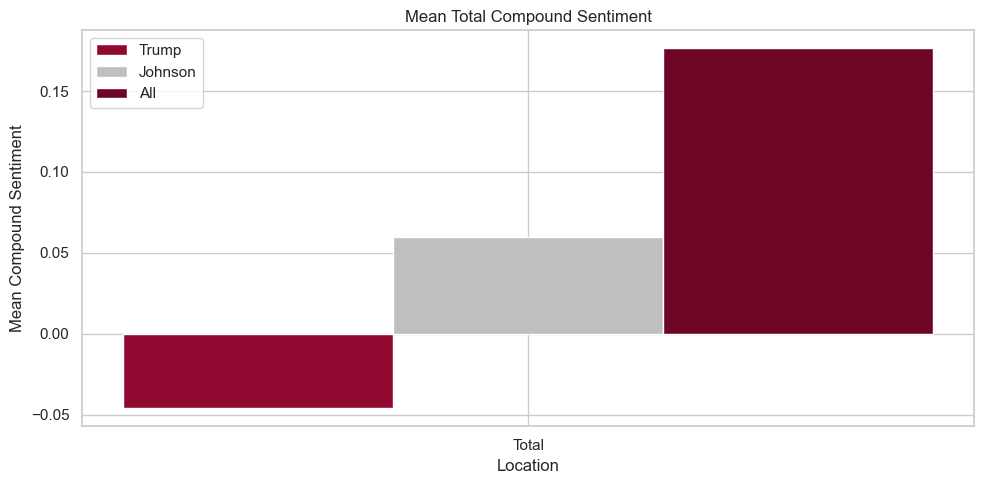

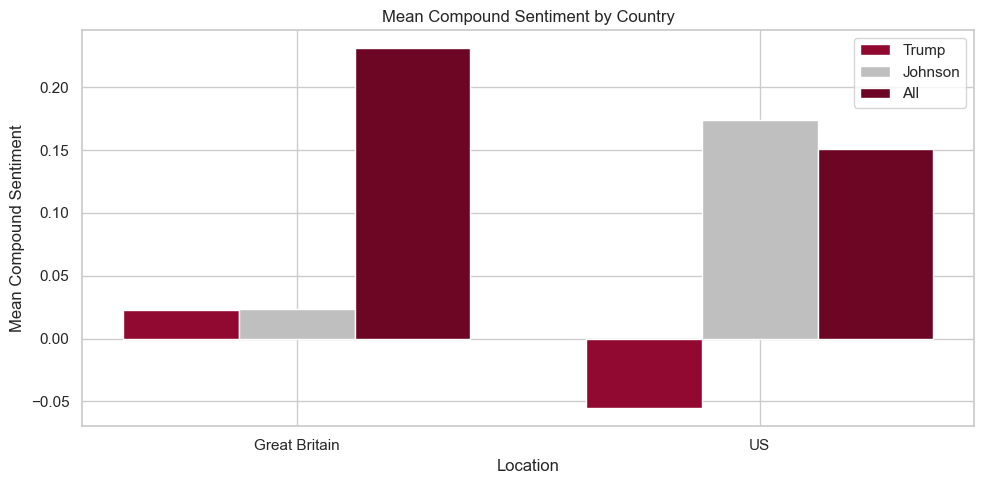

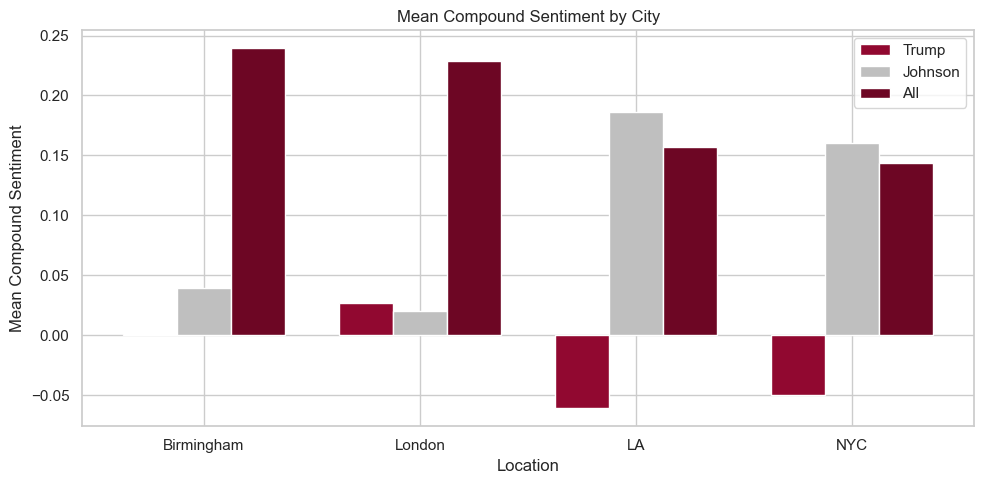

In [75]:
plot_mean_compound(mean_compound[mean_compound.columns[-1:]], filename=f'Mean Total Compound Sentiment')
plot_mean_compound(mean_compound[mean_compound.columns[-3:-1]], filename=f'Mean Compound Sentiment by Country')
plot_mean_compound(mean_compound[[cities[i] for i in [0, 2, 1, 3]]], filename=f'Mean Compound Sentiment by City')

### Variance

In [ ]:
# todo calculate variation of each country/city
def get_variance(data):
    return np.var(data.T)

In [ ]:
# group by country
# for simplicity reasons the average is used to combine the columns of the English and American cities despite their different number of relevant tweets
trump_country = pd.DataFrame(columns=trump_compound_sentiment.columns)
trump_country.loc['England'] = trump_compound_sentiment.loc[['Birmingham', 'London']].mean()
trump_country.loc['US'] = trump_compound_sentiment.loc[['LA', 'NYC']].mean()

johnson_country = pd.DataFrame(columns=johnson_compound_sentiment.columns)
johnson_country.loc['England'] = johnson_compound_sentiment.loc[['Birmingham', 'London']].mean()
johnson_country.loc['US'] = johnson_compound_sentiment.loc[['LA', 'NYC']].mean()

# Create DataFrames for the variances
city_variances = pd.DataFrame({
    'Trump': get_variance(trump_compound_sentiment),
    'Johnson': get_variance(johnson_compound_sentiment)
})

country_variances = pd.DataFrame({
    'Trump': get_variance(trump_country),
    'Johnson': get_variance(johnson_country)
})

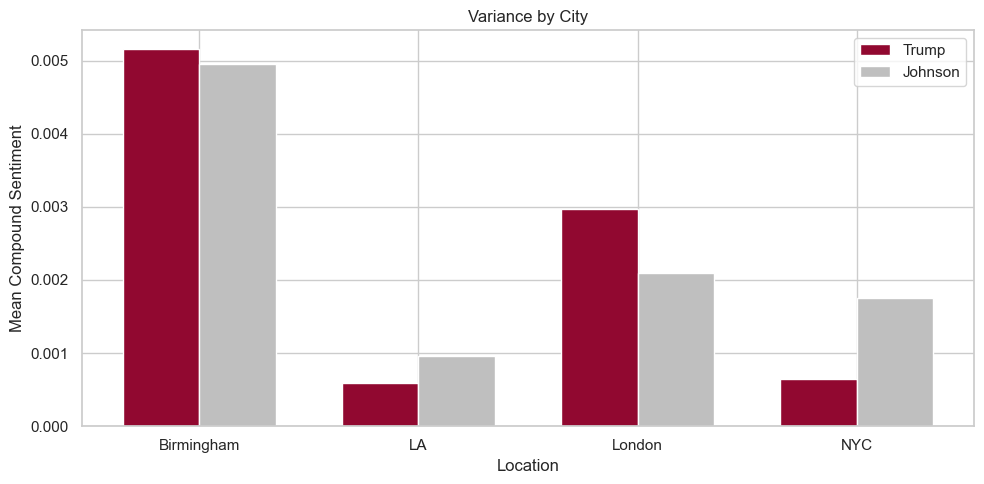

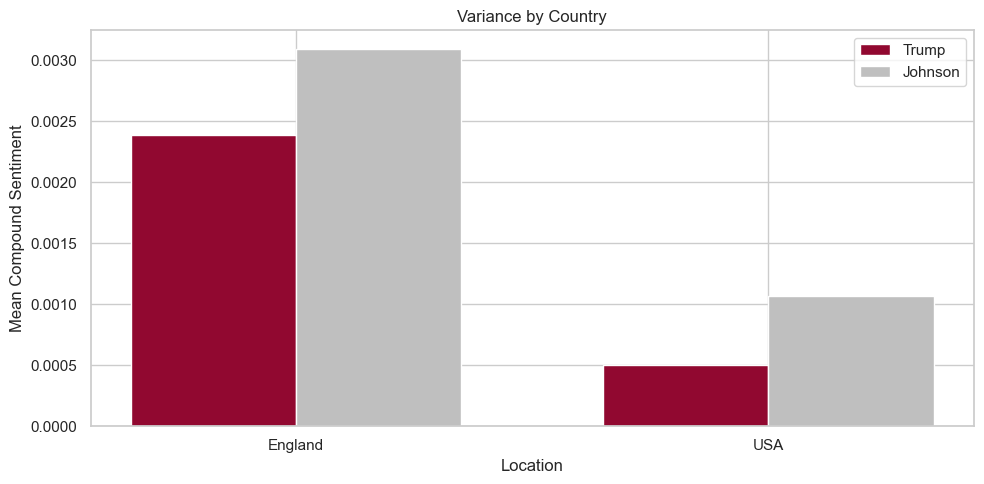

In [ ]:
plot_mean_compound(city_variances.T, filename="Variance by City")

plot_mean_compound(country_variances.T, filename="Variance by Country")

Average sentiment score in each city and country

In [ ]:
# TODO: run sql query to find out average
# get number of rows in sentiment column
# get average of 'Compound'

In [ ]:
conn = create_connection(db_file)
cur = conn.cursor()
cur.execute(f'SELECT {select} FROM {table} WHERE {where} LIMIT {limit}')

rows = cur.fetchall()

for row in rows:
    print(row)


In [17]:
def get_sum_and_count(db_file, table_name, col):
    """Get the sum and count of the 'Compound' column from the specified table."""
    conn = create_connection(db_file)
    if conn:
        query = f"""SELECT SUM({col}) as sum_col, COUNT(*) as count FROM {table_name}"""
        result = pd.read_sql_query(query, conn)
        sum_col = result.iloc[0]['sum_col']
        count = result.iloc[0]['count']
        conn.close()
        return sum_col, count
    else:
        return None

In [20]:
for city in cities:
    for year in years:
        for db_file in get_files(f'{root}{city}/{year}/'):
            compound_sum, compound_num_of_rows = get_sum_and_count(f'{root}{city}/{year}/{db_file}', 'sentiment', 'Compound')

KeyboardInterrupt: 

In [21]:
get_files(f'{root}{city}/')

['2018', '2019', '2020', '2021', '2022']

In [ ]:
# List of database files
db_files = ['path/to/db1.db', 'path/to/db2.db', ...]  # Add your database file paths here

# Calculate the sum and count of Compound values for each database
sums_counts = [get_sum_and_count(db_file) for db_file in db_files if get_sum_and_count(db_file) is not None]

# Calculate the overall sum and count
overall_sum = sum([item[0] for item in sums_counts])
overall_count = sum([item[1] for item in sums_counts])

# Calculate the overall average if there are valid sums and counts
if overall_count > 0:
    overall_average = overall_sum / overall_count
    print("Overall average of Compound:", overall_average)
else:
    print("No valid data to calculate average.")

Average sentiment of the presidents in each city and country

In [ ]:
for city in cities:
    trump = pd.read_pickle(f'{data_path}{presidents[0]}-{city}.pkl')
    johnson = pd.read_pickle(f'{data_path}{presidents[1]}-{city}.pkl')

In [2]:
trump = pd.read_pickle(f'{data_path}{presidents[0]}-Birmingham.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Festplatte/data-UA/data/trump-Birmingham.pkl'

In [10]:
trump.shape

(26758, 136)

In [11]:
trump.columns

Index(['item_number', 'id', 'created_at', 'created_timestamp', 'text',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang',
       ...
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'OtherP', 'Emoji'],
      dtype='object', length=136)

##### Birmingham

In [ ]:
trump = pd.read_pickle(f'{data_path}trump.pkl')
johnson = pd.read_pickle(f'{data_path}johnson.pkl')

##### LA